In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier

In [3]:
df_train= pd.read_csv(r"C:\Users\HP\Documents\Yakub_train.csv")

In [4]:
df_test= pd.read_csv(r"C:\Users\HP\Documents\Yakub_test.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [6]:
df_train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [7]:
df_test.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [8]:
df_train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [9]:
df_train['Qualification'].mode()[0]

'First Degree or HND'

In [10]:
#filling nan values with mode and indexing
df_train['Qualification']=df_train['Qualification'].fillna(value= df_train['Qualification'].mode()[0])
df_train['Qualification'].isnull().sum()

0

In [11]:
#LIST COMPREHENSION
b = [1,2,3,4,5,6,7,8,9,10]
a=[i for i in b if i%2==0]
a

[2, 4, 6, 8, 10]

In [12]:
a= []
b = [1,2,3,4,5,6,7,8,9,10]
for i in b:
    if i%2==0:
        a.append(i)

<AxesSubplot:xlabel='No_of_previous_employers', ylabel='count'>

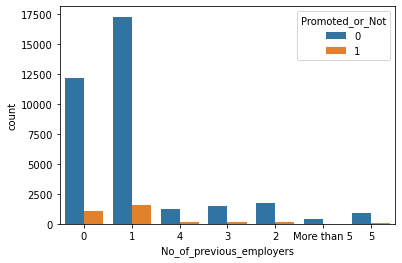

In [13]:
sns.countplot(x='No_of_previous_employers', hue='Promoted_or_Not', data= df_train)

In [14]:
#we will drop the rows with 'more than'  using conditional selection
df_train = df_train[df_train['No_of_previous_employers'] != 'More than 5']

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37911 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           37911 non-null  object 
 1   Division                             37911 non-null  object 
 2   Qualification                        37911 non-null  object 
 3   Gender                               37911 non-null  object 
 4   Channel_of_Recruitment               37911 non-null  object 
 5   Trainings_Attended                   37911 non-null  int64  
 6   Year_of_birth                        37911 non-null  int64  
 7   Last_performance_score               37911 non-null  float64
 8   Year_of_recruitment                  37911 non-null  int64  
 9   Targets_met                          37911 non-null  int64  
 10  Previous_Award                       37911 non-null  int64  
 11  Training_score_average      

In [16]:
#to have the dtype of the column as integer instead of object
df_train['No_of_previous_employers']= df_train['No_of_previous_employers'].astype('int')

In [17]:
df_train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                 int32
Promoted_or_Not                          int64
dtype: object

<AxesSubplot:xlabel='count', ylabel='Division'>

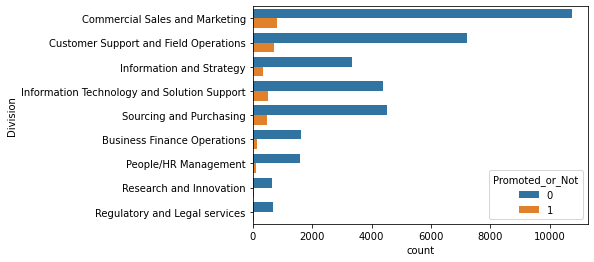

In [18]:
sns.countplot(y='Division', hue='Promoted_or_Not', data= df_train)

In [ ]:
#cat_cols= []
#for col in df_train.columns:
    #if df_train[col].dtype == 'object' and df_train[col].nunique()<10:
        #cat_cols.append(col)

In [ ]:
#cat_cols

In [19]:
categorical_cols = [col for col in df_train.columns
                    if df_train[col].dtype== 'object' and 
                    df_train[col].nunique()<10]
    


In [20]:
categorical_cols.remove('Qualification')
categorical_cols

['Division',
 'Gender',
 'Channel_of_Recruitment',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement']

In [21]:
df_train['Qualification'].value_counts()

First Degree or HND         26960
MSc, MBA and PhD            10368
Non-University Education      583
Name: Qualification, dtype: int64

In [22]:
def enc(col):
    if col == 'Non-University Education':
        return 0
    elif col == 'First Degree or HND':
        return 1
    else:
        return 2

In [23]:
df_train['Qualification']= df_train['Qualification'].apply(enc)
df_train['Qualification']

0        2
1        1
2        1
3        1
4        1
        ..
38307    1
38308    2
38309    1
38310    1
38311    1
Name: Qualification, Length: 37911, dtype: int64

In [24]:
data = pd.get_dummies(df_train, columns= categorical_cols, drop_first= True)
data

,EmployeeNo,Qualification,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,...,Division_Research and Innovation,Division_Sourcing and Purchasing,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_Yes
0,YAK/S/00001,2,2,1986,12.5,2011,1,0,41,ANAMBRA,...,0,0,0,1,0,0,0,0,0,0
1,YAK/S/00002,1,2,1991,12.5,2015,0,0,52,ANAMBRA,...,0,0,1,0,0,1,0,0,0,0
2,YAK/S/00003,1,2,1987,7.5,2012,0,0,42,KATSINA,...,0,0,1,1,0,1,0,0,0,0
3,YAK/S/00004,1,3,1982,2.5,2009,0,0,42,NIGER,...,0,0,1,0,0,1,0,1,0,0
4,YAK/S/00006,1,3,1990,7.5,2012,0,0,77,AKWA IBOM,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,YAK/S/54802,1,2,1990,0.0,2018,0,0,70,LAGOS,...,0,0,0,1,0,1,0,0,0,0
38308,YAK/S/54805,2,2,1984,5.0,2013,0,0,48,IMO,...,0,0,0,0,0,1,0,0,0,0
38309,YAK/S/54806,1,2,1994,12.5,2016,1,0,71,ANAMBRA,...,0,0,1,0,0,0,0,0,0,0
38310,YAK/S/54807,1,2,1992,2.5,2017,0,0,37,KWARA,...,0,0,1,1,0,1,0,0,0,0


In [25]:
data.drop(['EmployeeNo', 'State_Of_Origin'], axis=1, inplace= True)

In [26]:
data

,Qualification,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not,...,Division_Research and Innovation,Division_Sourcing and Purchasing,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_Yes
0,2,2,1986,12.5,2011,1,0,41,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,2,1991,12.5,2015,0,0,52,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2,1987,7.5,2012,0,0,42,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1,3,1982,2.5,2009,0,0,42,1,0,...,0,0,1,0,0,1,0,1,0,0
4,1,3,1990,7.5,2012,0,0,77,1,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,1,2,1990,0.0,2018,0,0,70,0,0,...,0,0,0,1,0,1,0,0,0,0
38308,2,2,1984,5.0,2013,0,0,48,1,0,...,0,0,0,0,0,1,0,0,0,0
38309,1,2,1994,12.5,2016,1,0,71,3,0,...,0,0,1,0,0,0,0,0,0,0
38310,1,2,1992,2.5,2017,0,0,37,1,0,...,0,0,1,1,0,1,0,0,0,0


<AxesSubplot:>

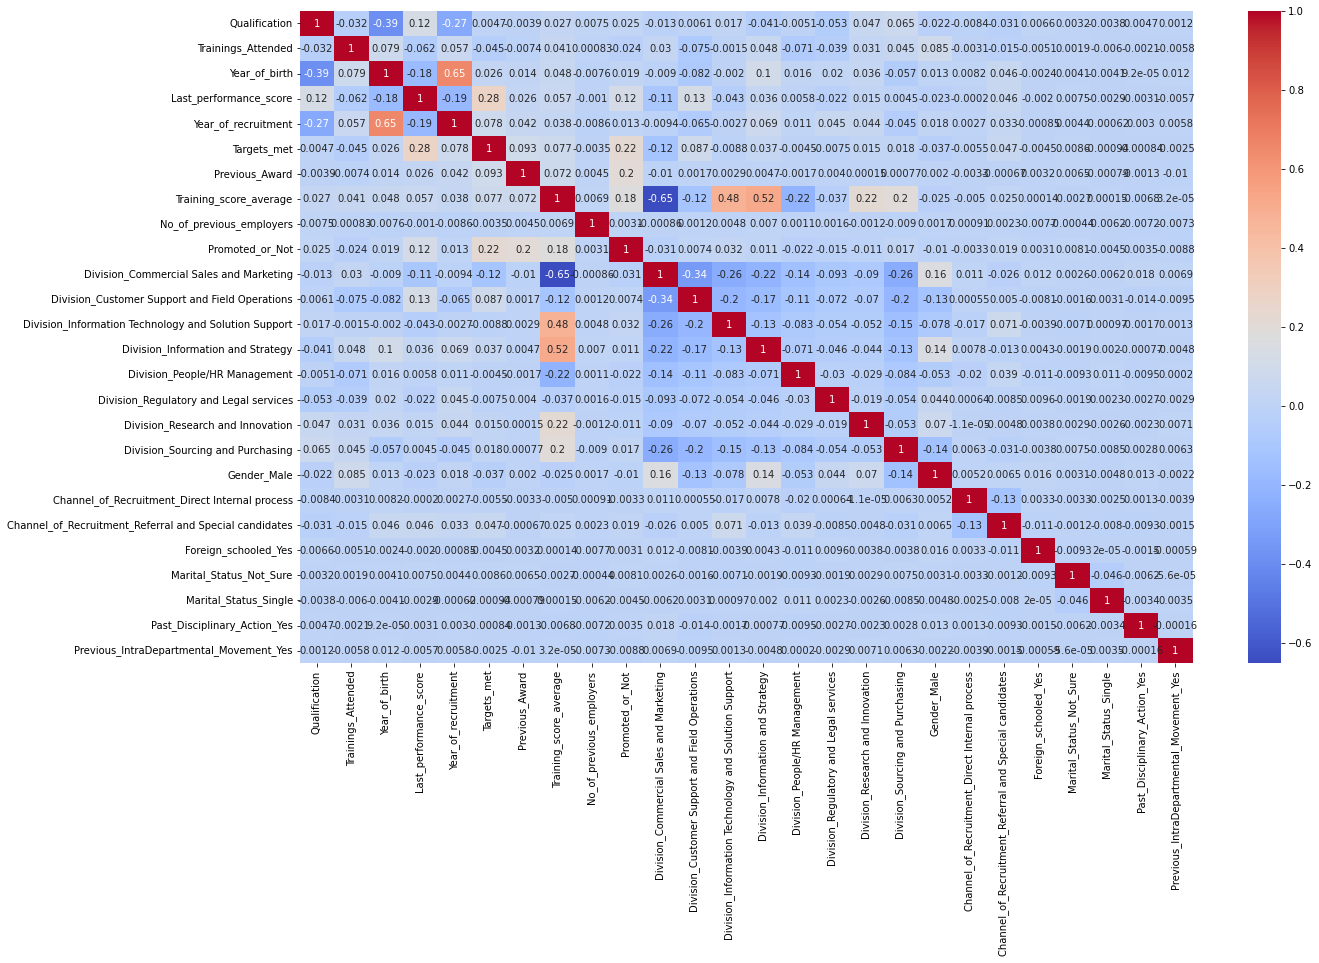

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37911 entries, 0 to 38311
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Qualification                                           37911 non-null  int64  
 1   Trainings_Attended                                      37911 non-null  int64  
 2   Year_of_birth                                           37911 non-null  int64  
 3   Last_performance_score                                  37911 non-null  float64
 4   Year_of_recruitment                                     37911 non-null  int64  
 5   Targets_met                                             37911 non-null  int64  
 6   Previous_Award                                          37911 non-null  int64  
 7   Training_score_average                                  37911 non-null  int64  
 8   No_of_previous_employers            

In [29]:
X= data[['Targets_met', 'Previous_Award', 'Training_score_average', 'Last_performance_score']]

In [30]:
y= data['Promoted_or_Not']

In [31]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rfc.score(X_test, y_test)

0.9254439950764902

In [34]:
rfc.score(X_train, y_train)

0.9284395372498775

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
print(f1_score(y_test, y_pred))

0.273972602739726


In [37]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10453
           1       0.65      0.17      0.27       921

    accuracy                           0.93     11374
   macro avg       0.79      0.58      0.62     11374
weighted avg       0.91      0.93      0.91     11374



In [38]:
    r_model= RandomForestClassifier()
    x_model= XGBClassifier()

In [78]:
def model_predict(model, X_train=X_train, y_train=y_train, X_test=X_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred

In [40]:
def model_pred(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_sc = f1_score(y_test, pred)
    class_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    return pred, f1_sc, class_report, conf_matrix

In [41]:
x_pred= model_pred(x_model)

In [79]:
print(x_pred[2])

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10453
           1       0.70      0.16      0.26       921

    accuracy                           0.93     11374
   macro avg       0.82      0.58      0.61     11374
weighted avg       0.91      0.93      0.90     11374



In [43]:
r_pred= model_pred(r_model)

In [44]:
print(r_pred[2])

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10453
           1       0.67      0.16      0.26       921

    accuracy                           0.93     11374
   macro avg       0.80      0.58      0.61     11374
weighted avg       0.91      0.93      0.90     11374



## to handle class imbalance using models

Using class weights to balance dataset
We can assign different weights to the majority and minority classes, according to their distribution, and modify our training algorithm so that it takes that information into account during the training phase.

It will then penalize errors when the minority class is misclassified, in essence "forcing" the model to to better learn their features and patterns.

To use weighted classes, we have to retrain our model using the original train set, but this time telling the algorithm to use weights when calculating errors:

In [ ]:
# Import function used in calculating weights
from sklearn.utils import class_weight

In [45]:
rfc_b= RandomForestClassifier(class_weight= 'balanced')
xgb_b = XGBClassifier(class_weight= 'balanced')

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
y_train.value_counts()

0    24248
1     2289
Name: Promoted_or_Not, dtype: int64

Resampling the dataset

In [48]:
upsampler = SMOTE(sampling_strategy=0.8, random_state= 1)

In [49]:
X_resampled, y_resampled = upsampler.fit_resample(X_train, y_train)

In [50]:
y_resampled.value_counts()

0    24248
1    19398
Name: Promoted_or_Not, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()

In [53]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [54]:
y_pred = rfc.predict(X_test)

In [55]:
y_b_pred= rfc.predict(X_test)

In [56]:
print(classification_report(y_test, y_b_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     10453
           1       0.18      0.72      0.29       921

    accuracy                           0.72     11374
   macro avg       0.58      0.72      0.56     11374
weighted avg       0.90      0.72      0.78     11374



## predicting on Test Dataset

In [57]:
def model_pred(model, X_train=X_train, y_train=y_train, X_test=X_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           16496 non-null  object 
 1   Division                             16496 non-null  object 
 2   Qualification                        15766 non-null  object 
 3   Gender                               16496 non-null  object 
 4   Channel_of_Recruitment               16496 non-null  object 
 5   Trainings_Attended                   16496 non-null  int64  
 6   Year_of_birth                        16496 non-null  int64  
 7   Last_performance_score               16496 non-null  float64
 8   Year_of_recruitment                  16496 non-null  int64  
 9   Targets_met                          16496 non-null  int64  
 10  Previous_Award                       16496 non-null  int64  
 11  Training_score_average      

In [59]:
x_val =df_test[['Targets_met', 'Previous_Award', 'Training_score_average', 'Last_performance_score']] 

In [60]:
x_val.head()

,Targets_met,Previous_Award,Training_score_average,Last_performance_score
0,0,0,65,7.5
1,0,0,69,0.0
2,0,0,76,7.5
3,0,0,52,2.5
4,1,0,69,7.5


In [61]:
predictions= model_pred(xgb_b, X_test= x_val)
predictions

[11:25:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



array([0, 0, 0, ..., 0, 0, 0])

In [62]:
df_test['Promoted_or_not']= predictions

In [63]:
df_test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_not
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1,0
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1,0
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1,0
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1,0
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0,0


In [64]:
df_test['Promoted_or_not'].value_counts()

0    16210
1      286
Name: Promoted_or_not, dtype: int64

In [65]:
submission = df_test[['EmployeeNo', 'Promoted_or_not']]

In [66]:
submission.head()

,EmployeeNo,Promoted_or_not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [68]:
submission.to_csv('submission_Xgb.csv', index= False)

## HyperParameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'n_estimators':[200, 500, 1000], 
              'max_depth':np.arange(5,10,2),
              'learning_rate':[0.01, 0.1],
              'min_child_weight': np.arange(1, 6, 5)} 

In [74]:
grid= GridSearchCV(x_model, param_grid=param_grid, verbose= 3)

In [75]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.926 total time=   2.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.927 total time=   2.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.925 total time=   1.9s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.924 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200;, score=0.924 total time=   1.7s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.926 total time=   5.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.926 total time=   4.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500;, score=0.924 total time=   4.8s
[CV 4/5] EN

[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000;, score=0.925 total time=  12.1s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000;, score=0.924 total time=  12.4s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000;, score=0.923 total time=  10.0s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=1000;, score=0.922 total time=  22.5s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=200;, score=0.926 total time=   5.0s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=200;, score=0.925 total time=   3.8s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=200;, score=0.924 total time=   4.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=200;, score=0.923 total time=   4.0s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimator

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': array([5, 7, 9]),
                         'min_child_weight': array([1]),
                         'n_estimators': [200, 500, 1000]},
             verbose=3)

In [76]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200}

In [77]:
x_grid_model =XGBClassifier(learning_rate= 0.01,
                            max_depth= 5,
                            min_child_weight= 1,
                            n_estimators= 200, random_state= 0)

In [80]:
x_grid_pred= model_predict(x_grid_model)

In [81]:
print(classification_report(y_test, x_grid_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10453
           1       0.77      0.15      0.25       921

    accuracy                           0.93     11374
   macro avg       0.85      0.57      0.61     11374
weighted avg       0.92      0.93      0.90     11374



In [82]:
# using the grid to predict
grid_pred = grid.predict(X_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10453
           1       0.77      0.15      0.25       921

    accuracy                           0.93     11374
   macro avg       0.85      0.57      0.61     11374
weighted avg       0.92      0.93      0.90     11374



## Use tuned model on test data

In [83]:
grid_predictions_df_test= grid.predict(x_val)

In [84]:
df_test['Promoted_or_not']= grid_predictions_df_test

In [85]:
new_submission = df_test[['EmployeeNo', 'Promoted_or_not']]
new_submission.head()

,EmployeeNo,Promoted_or_not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [86]:
new_submission.to_csv('Submission_gridXgb.csv', index= False)